You are given a generated regression dataset `D: (X, y)` along already split train and test subsets, `X_train, X_test, y_train, y_test`.

    Logistic regression tasks
    -----------------------
    1. Build a logistic regression model using sklearn.
    2. Use no-regularization and any other 2 regulartion methods.
    3. Compute the accuracy on the train and test sets (for all models).
    4. Describe what you have seen based on the experiements (minimum 150 words).
    5. Answer any questions asked in question 7.

Resources:
1. [Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score


In [3]:
#@title Data Generation (DO NOT MODIFY)
X, y = make_classification(n_samples=500, n_features=10, n_redundant=4, 
                                 n_informative=6, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# WRITE YOUR CODE STARTING HERE

In [4]:
X_train

array([[ 2.45608701, -0.85609901,  0.98440626, ..., -3.38343226,
        -1.93383223, -0.85671185],
       [ 3.77590571,  0.70308327,  0.14427569, ..., -1.7963977 ,
        -1.43426437, -2.10467048],
       [-0.02500899,  1.79144961,  4.12125544, ..., -5.036711  ,
         0.53288924,  0.02878021],
       ...,
       [-4.89608214,  2.6480412 , -1.59410344, ...,  4.58937926,
         6.00621347,  1.65361367],
       [-1.00627793,  1.93959633,  2.68091606, ..., -2.03460225,
         0.25254915, -0.36383412],
       [-2.46119572,  2.94007752,  0.54852945, ...,  0.76686972,
         1.60501577, -0.68299244]])

**No** **Regularization**

In [5]:
clf1 = LogisticRegression(penalty='none').fit(X_train,y_train)

In [6]:
y_pred_test = clf1.predict(X_test)
y_pred_train = clf1.predict(X_train)

In [7]:
clf1.coef_

array([[ 0.52111519, -0.87199428, -0.32741849, -0.06065919,  0.17839203,
        -0.25366652,  0.98940785, -0.1846304 , -0.57059891, -0.05437802]])

In [8]:
test_error = mean_squared_error(y_test,y_pred_test)
train_error = mean_squared_error(y_train,y_pred_train)
print("Train error", train_error)
print("Test error", test_error)

Train error 0.096
Test error 0.112


In [9]:
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Train accuracy 0.904
Test accuracy 0.888


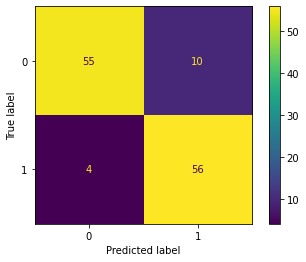

In [43]:
plot_confusion_matrix(clf1, X_test, y_test)
plt.show()

**L1** **Regularization**

In [10]:
clf = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train,y_train)

In [11]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [12]:
clf.coef_

array([[ 0.62431141, -0.54790721, -0.26807556,  0.        ,  0.        ,
        -0.18157772,  1.14785435,  0.        , -0.5925664 ,  0.        ]])

In [13]:
test_error = mean_squared_error(y_test,y_pred_test)
train_error = mean_squared_error(y_train,y_pred_train)
print("Train error", train_error)
print("Test error", test_error)

Train error 0.10133333333333333
Test error 0.128


In [14]:
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Train accuracy 0.8986666666666666
Test accuracy 0.872


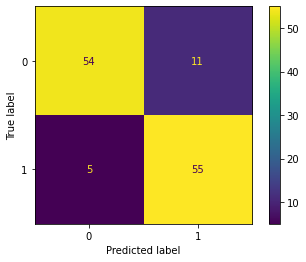

In [44]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

**L2** **Regularization**

In [15]:
clf2 = LogisticRegression(penalty='l2').fit(X_train,y_train)

In [16]:
y_pred_test = clf2.predict(X_test)
y_pred_train = clf2.predict(X_train)

In [17]:
clf2.coef_

array([[ 0.50661027, -0.84929268, -0.31254191, -0.07605685,  0.15337002,
        -0.19131031,  0.93557548, -0.16990146, -0.54385095, -0.0283362 ]])

In [18]:
test_error = mean_squared_error(y_test,y_pred_test)
train_error = mean_squared_error(y_train,y_pred_train)
print("Train error", train_error)
print("Test error", test_error)

Train error 0.09866666666666667
Test error 0.112


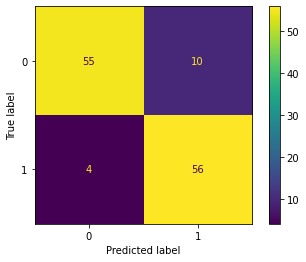

In [45]:
plot_confusion_matrix(clf2, X_test, y_test)
plt.show()

**Observations**

1] In our problem, we have implemented No-Regularization, L1 (Lasso Regularization), and L2(Ridge Regularization) regularization methods on our logistic model. By using the model, we estimated the prediction values of y_test and y_train. Thereby, determining the final coefficient values of our model, train/test accuracies, and mean square errors.

2] Based on observing the difference in coefficient values obtained from both the regularization methods. For L1 we could see the coefficient estimates were shrunk towards 0 which means these features won’t be having any effect on the cost function which generates a non-complex model.

3] For L2 we could notice that all the coefficient estimates are either positive or negatively closer to 0 (accurate predictions), but none of them are 0’s generating a complex model.

4] Although through L1 regularization we get a sparse output, it can help in the feature selection process before deciding on the model fit. Whereas, through L2 regularization we get lesser sparse output.

5] The train and test Mean square error values for L2 model are lower compared to L1 model. So, we may say that Lasso shrinks the estimate values towards 0 eventually removing the some important features which may reduce the error. 

6] Therby, we can say that Lasso may work more efficiently for feature selection when there are large number of features in our dataset.


